In [1]:
from google.colab import files
uploaded = files.upload()

Saving mail_data.csv to mail_data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
# loading the data from csv file to a pandas Dataframe
df = pd.read_csv('mail_data.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# replace the null values with a null string
mail_data = df.where((pd.notnull(df)),'')

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Extract features and labels
X = df['Message']
y = df['Category'].map({'ham': 0, 'spam': 1})  # Convert 'ham' to 0 and 'spam' to 1

In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [48]:
# Fit and transform the training data
X_train_features = vectorizer.fit_transform(X_train)

In [49]:
# Transform the test data
X_test_features = vectorizer.transform(X_test)

In [50]:
# Create SVM classifier with a linear kernel and probability=True
svm_classifier = SVC(kernel='linear', probability=True)

# Train the classifier
svm_classifier.fit(X_train_features, y_train)

SVC(kernel='linear', probability=True)

In [51]:
# Predict on the test data
y_pred = svm_classifier.predict(X_test_features)
y_prob = svm_classifier.predict_proba(X_test_features)[:, 1]

In [52]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       0.99      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



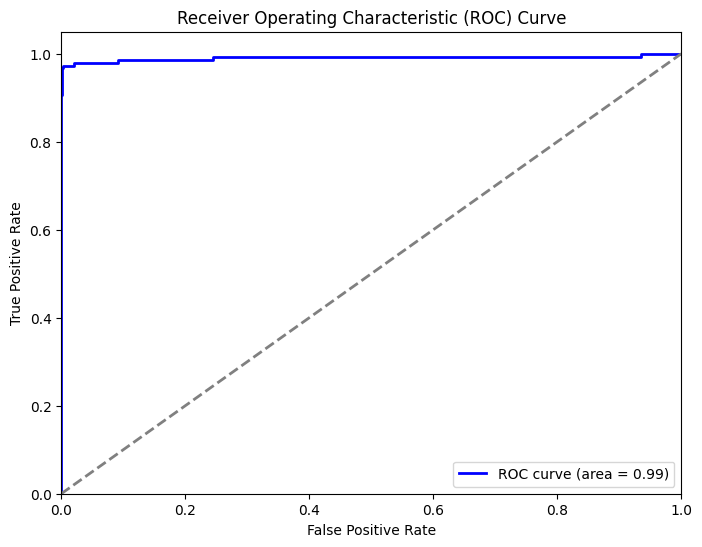

In [54]:
# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
# Predicting a new email
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill my promise. You have been wonderful and a blessing at all times"]

# Convert text to feature vectors
input_data_features = vectorizer.transform(input_mail)

# Make prediction
prediction = svm_classifier.predict(input_data_features)

# Print prediction result
print("Prediction:", "Ham mail" if prediction[0] == 0 else "Spam mail")

Prediction: Ham mail
